# DETECTION OF EMAIL SPAM WITH MACHINE LEARNING

# We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.
# In this Project, I have used Python to build an email spam detector. Then, I used machine learning to train the spam detector to recognize and classify emails into spam and non-spam. 

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
data = pd.read_csv("spam.csv", encoding='Latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Describing the data

In [5]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


# Finding the null values if any

In [6]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# Renaming the columns

In [7]:
data = data[['v1', 'v2']]
data.columns = ['type', 'message']
data.head()
     

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.groupby('type').size()


type
ham     4825
spam     747
dtype: int64

# Data Visualization

<AxesSubplot:>

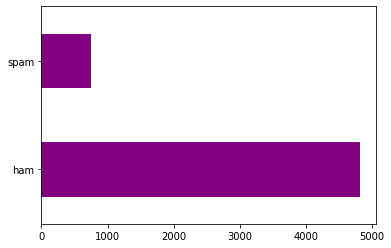

In [9]:
data['type'].value_counts().plot(kind='barh', color= 'purple')


# Natural Language Processing

# Text Preprocessing and Stemming

In [10]:
#Importing the libraries
import re
import nltk
#Download the Stopwords from nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#Using PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SarayuPalem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stem1 = PorterStemmer()
corpus = []
for i in range(0, len(data)):
    show = re.sub('[^a-zA-Z]', ' ', data['message'][i])
    show = show.lower()
    show = show.split()
    show = [stem1.stem(word) for word in show if not word in stopwords.words('english')]
    show = ' '.join(show)
    corpus.append(show)

#Printing the first 6 values in the corpus list
corpus[1:7]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
count1 = CountVectorizer(max_features = 4000)
X = count1.fit_transform(corpus).toarray()
Y = pd.get_dummies(data['type'])
Y = Y.iloc[:, 1].values

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)


In [15]:
# Model 1 - DecisionTreeClassifier
dtcmodel= DecisionTreeClassifier()
dtcmodel.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
# Model 2 - RandomForestClassifier
rfcmodel= RandomForestClassifier()
rfcmodel.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
# Model 3 - Multinomial Naïve Bayes
mnbmodel= MultinomialNB()
mnbmodel.fit(x_train, y_train)

MultinomialNB()

In [18]:
# Model 4 - SVC
svcmodel= SVC()
svcmodel.fit(x_train, y_train)

SVC()

In [19]:
pre1 = dtcmodel.predict(x_test)
pre2 = rfcmodel.predict(x_test)
pre3 = mnbmodel.predict(x_test)
pre4 = svcmodel.predict(x_test)

In [20]:
# Model1 - DTC
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pre1))
print("Accuracy: ", accuracy_score(y_test, pre1)*100)
print("-------------**---------------")


Decision Tree Classifier
Confusion Matrix: 
[[957   8]
 [ 22 128]]
Accuracy:  97.30941704035875
-------------**---------------


In [21]:
# Model2 - RFC
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pre2))
print("Accuracy: ", accuracy_score(y_test, pre2)*100)
print("-------------**---------------")

Random Forest Classifier
Confusion Matrix: 
[[964   1]
 [ 24 126]]
Accuracy:  97.75784753363229
-------------**---------------


In [22]:
# Model3 - Multinomial Naïve Bayes
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pre3))
print("Accuracy: ", accuracy_score(y_test, pre3)*100)
print("-------------**---------------")

Multinomial Naïve Bayes
Confusion Matrix: 
[[951  14]
 [ 10 140]]
Accuracy:  97.847533632287
-------------**---------------


In [23]:
# Model4 - SVC
print("Support Vector Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pre4))
print("Accuracy: ", accuracy_score(y_test, pre4)*100)
print("-------------**---------------")

Support Vector Classifier
Confusion Matrix: 
[[965   0]
 [ 23 127]]
Accuracy:  97.9372197309417
-------------**---------------


<AxesSubplot:>

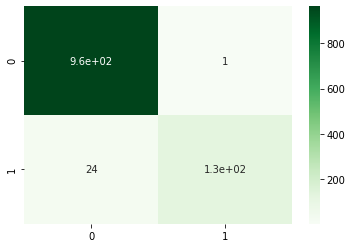

In [24]:
from sklearn.metrics import confusion_matrix
email = confusion_matrix(y_test, pre2)
import seaborn as sns
sns.heatmap(email, annot=True,cmap='Greens')

In [25]:
from sklearn.metrics import classification_report


In [26]:
rfcreport = classification_report(y_test, pre1)
print("Classification Report of RFC \n", rfcreport)
dtcreport = classification_report(y_test, pre2)
print("Classification Report of DTC \n", dtcreport)
mnbreport = classification_report(y_test, pre3)
print("Classification Report of MNB \n", mnbreport)
svcreport = classification_report(y_test, pre4)
print("Classification Report of SVC \n", svcreport)

Classification Report of RFC 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       965
           1       0.94      0.85      0.90       150

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Classification Report of DTC 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Classification Report of MNB 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96  

# Model Saving

In [27]:
import pickle

In [28]:
filename = "RFC.pkl"
pickle.dump(rfcmodel, open(filename, 'wb'))
filename = "DTC.pkl"
pickle.dump(dtcmodel, open(filename, 'wb'))
filename = "MNB.pkl"
pickle.dump(mnbmodel, open(filename, 'wb'))
filename = "SVM.pkl"
pickle.dump(svcmodel, open(filename, 'wb'))
print("Saved all Models")

Saved all Models
